In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Preprocessing the data

#### Interaction data

In [2]:
interaction = pd.read_csv("../data/recipe/RAW_interactions.csv")
interaction.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


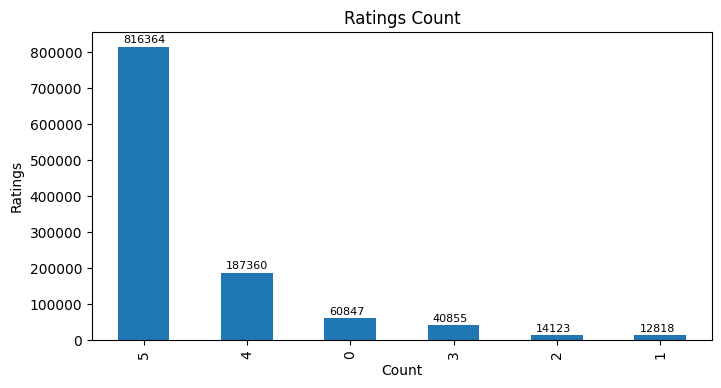

In [3]:
ax = interaction['rating'].value_counts().plot(kind='bar', figsize=(8, 4))
plt.title("Ratings Count")
plt.xlabel("Count")
plt.ylabel("Ratings")

# Add rating count on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.05, p.get_height() + 10000), fontsize=8)

In [4]:
interaction.isna().sum()

user_id        0
recipe_id      0
date           0
rating         0
review       169
dtype: int64

In [5]:
interaction[interaction['review'].isna()][['rating']].value_counts()

rating
5         135
4          27
1           3
3           3
2           1
dtype: int64

In [6]:
for review in interaction[interaction['rating'] == 0]['review'][:10]:
    print(review)

Just an observation, so I will not rate.  I followed this procedure with strawberries instead of raspberries.  Perhaps this is the reason it did not work well.  Sorry to report that the strawberries I did in August were moldy in October.  They were stored in my downstairs fridge, which is very cold and infrequently opened.  Delicious and fresh-tasting prior to that, though.  So, keep a sharp eye on them.  Personally I would not keep them longer than a month.  This recipe also appears as #120345 posted in July 2009, which is when I tried it.  I also own the Edna Lewis cookbook in which this appears.
Made my own buttermilk w/ vinegar and milk.  Used defrosted fresh skinless/boneless chicken fillets.  3 lbs.
This mix is extremely flavorful and its light .  I didnt do the bbq thing, but while I cooked homemade to go w/ this I put the chicken in the oven to keep warm and served bbq dipping sauce.  10 stars from my kids !
This is a very good recipe.  We also want to cut back on the fat conte

From the above observation we can see 169 people who did not gave review but rate the food recipe. And there were 60847 people who did not rate the food but gave review about the recipe.

0 rating was given instead of null value so we will keep it same.

In [7]:
interaction = interaction[['user_id', 'recipe_id', 'rating']]

In [8]:
interaction.head()

,user_id,recipe_id,rating
0,38094,40893,4
1,1293707,40893,5
2,8937,44394,4
3,126440,85009,5
4,57222,85009,5


In [9]:
rating_frequency_count = interaction.groupby('user_id').count()['rating'].sort_values(ascending=False).reset_index(drop=True)

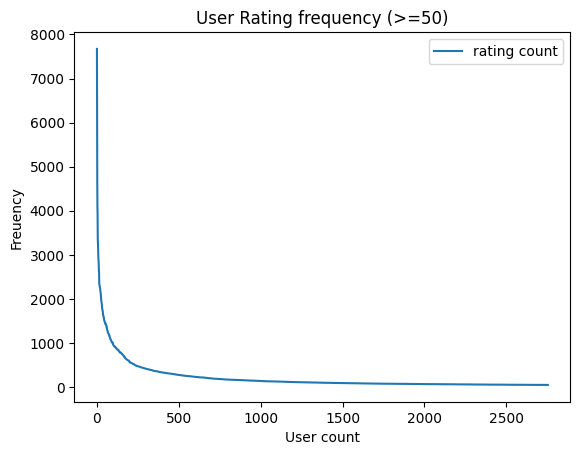

In [10]:
ax = rating_frequency_count[rating_frequency_count >= 50].plot(kind='line', label='rating count')

plt.title("User Rating frequency (>=50)")
plt.xlabel("User count")
plt.ylabel("Freuency")

plt.legend(loc='upper right');

#### Recipe data

In [11]:
recipe = pd.read_csv("../data/recipe/RAW_recipes.csv")
recipe.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [12]:
recipe.drop(['contributor_id', 'submitted'], axis=1, inplace=True)

In [13]:
recipe.rename(columns = {'id':'recipe_id'}, inplace = True)

In [14]:
recipe.head(3)

,name,recipe_id,minutes,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13


### Merging the dataset

In [15]:
merged_data = interaction.merge(recipe, how='left', on='recipe_id')

In [16]:
merged_data.head()

,user_id,recipe_id,rating,name,minutes,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,38094,40893,4,white bean green chile pepper soup,495,"['weeknight', 'time-to-make', 'course', 'main-...","[204.8, 5.0, 9.0, 26.0, 24.0, 2.0, 10.0]",4,"['combine beans , onion , chilies , 1 / 2 teas...",easy soup for the crockpot.,"['great northern beans', 'yellow onion', 'dice...",9
1,1293707,40893,5,white bean green chile pepper soup,495,"['weeknight', 'time-to-make', 'course', 'main-...","[204.8, 5.0, 9.0, 26.0, 24.0, 2.0, 10.0]",4,"['combine beans , onion , chilies , 1 / 2 teas...",easy soup for the crockpot.,"['great northern beans', 'yellow onion', 'dice...",9
2,8937,44394,4,devilicious cookie cake delights,20,"['30-minutes-or-less', 'time-to-make', 'course...","[132.3, 11.0, 39.0, 5.0, 4.0, 11.0, 5.0]",5,"['blend together cake mix , oil and eggs', 'ad...",NaN,"[""devil's food cake mix"", 'vegetable oil', 'eg...",4
3,126440,85009,5,baked potato toppings,10,"['15-minutes-or-less', 'time-to-make', 'course...","[2786.2, 342.0, 134.0, 290.0, 161.0, 301.0, 42.0]",3,['pick whichever topping you want to use and c...,these toppings sure makes a nice change from p...,"['mayonnaise', 'salsa', 'cheddar cheese', 'ref...",13
4,57222,85009,5,baked potato toppings,10,"['15-minutes-or-less', 'time-to-make', 'course...","[2786.2, 342.0, 134.0, 290.0, 161.0, 301.0, 42.0]",3,['pick whichever topping you want to use and c...,these toppings sure makes a nice change from p...,"['mayonnaise', 'salsa', 'cheddar cheese', 'ref...",13


In [17]:
merged_data.isna().sum()

user_id              0
recipe_id            0
rating               0
name                 1
minutes              0
tags                 0
nutrition            0
n_steps              0
steps                0
description      23510
ingredients          0
n_ingredients        0
dtype: int64

In [18]:
merged_data['description'].fillna('', inplace=True)

In [19]:
merged_data.dropna(inplace=True)

In [20]:
merged_data.head()

,user_id,recipe_id,rating,name,minutes,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,38094,40893,4,white bean green chile pepper soup,495,"['weeknight', 'time-to-make', 'course', 'main-...","[204.8, 5.0, 9.0, 26.0, 24.0, 2.0, 10.0]",4,"['combine beans , onion , chilies , 1 / 2 teas...",easy soup for the crockpot.,"['great northern beans', 'yellow onion', 'dice...",9
1,1293707,40893,5,white bean green chile pepper soup,495,"['weeknight', 'time-to-make', 'course', 'main-...","[204.8, 5.0, 9.0, 26.0, 24.0, 2.0, 10.0]",4,"['combine beans , onion , chilies , 1 / 2 teas...",easy soup for the crockpot.,"['great northern beans', 'yellow onion', 'dice...",9
2,8937,44394,4,devilicious cookie cake delights,20,"['30-minutes-or-less', 'time-to-make', 'course...","[132.3, 11.0, 39.0, 5.0, 4.0, 11.0, 5.0]",5,"['blend together cake mix , oil and eggs', 'ad...",,"[""devil's food cake mix"", 'vegetable oil', 'eg...",4
3,126440,85009,5,baked potato toppings,10,"['15-minutes-or-less', 'time-to-make', 'course...","[2786.2, 342.0, 134.0, 290.0, 161.0, 301.0, 42.0]",3,['pick whichever topping you want to use and c...,these toppings sure makes a nice change from p...,"['mayonnaise', 'salsa', 'cheddar cheese', 'ref...",13
4,57222,85009,5,baked potato toppings,10,"['15-minutes-or-less', 'time-to-make', 'course...","[2786.2, 342.0, 134.0, 290.0, 161.0, 301.0, 42.0]",3,['pick whichever topping you want to use and c...,these toppings sure makes a nice change from p...,"['mayonnaise', 'salsa', 'cheddar cheese', 'ref...",13


In [21]:
merged_data.isna().sum()

user_id          0
recipe_id        0
rating           0
name             0
minutes          0
tags             0
nutrition        0
n_steps          0
steps            0
description      0
ingredients      0
n_ingredients    0
dtype: int64

In [23]:
merged_data.to_csv("../data/recipe/merged_data.csv", index=False)